<a href="https://colab.research.google.com/github/Vemula-Meenakshi/oasis-infobyte/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt
#import the sklearn librares
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [ ]:
data=pd.read_csv('/car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.shape

(301, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.describe().style.background_gradient(cmap='winter')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
corr=data.corr().style.background_gradient(cmap='gray')
corr

<ipython-input-10-220bf36517a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr().style.background_gradient(cmap='gray')


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


<ipython-input-11-735536c3b150>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='rainbow')


<Axes: >

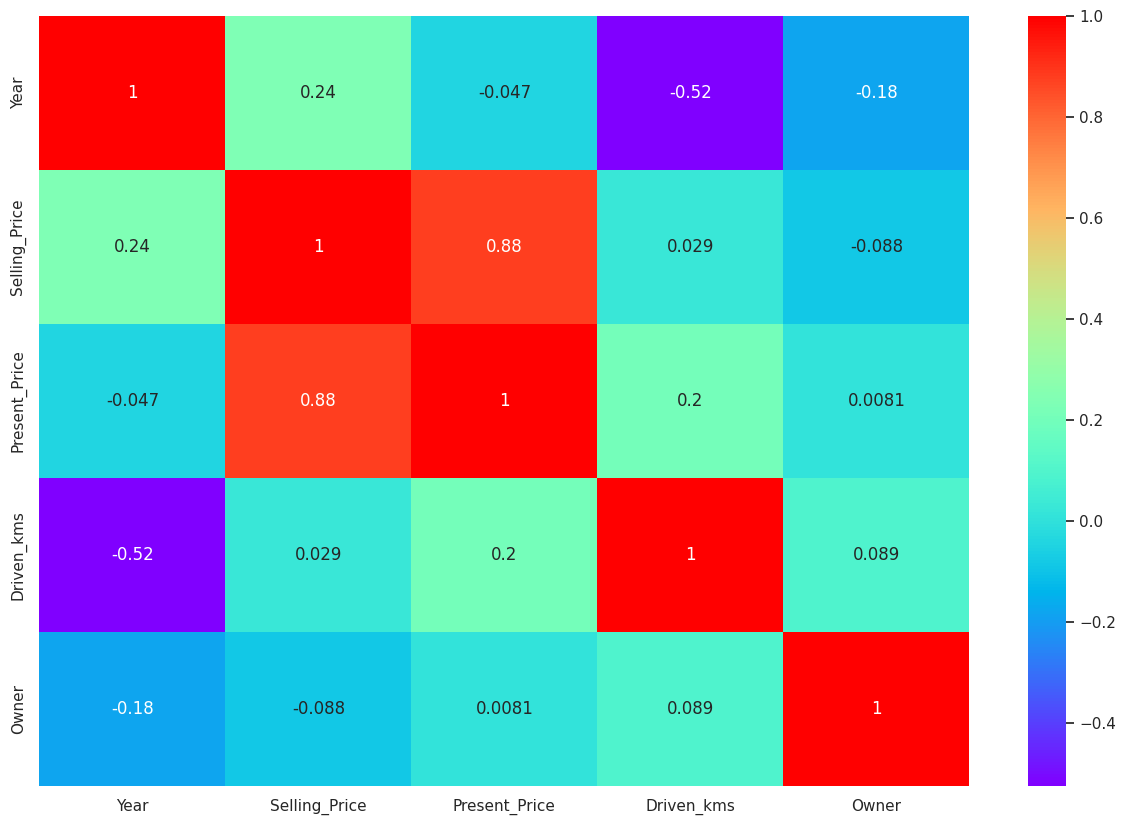

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

In [ ]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

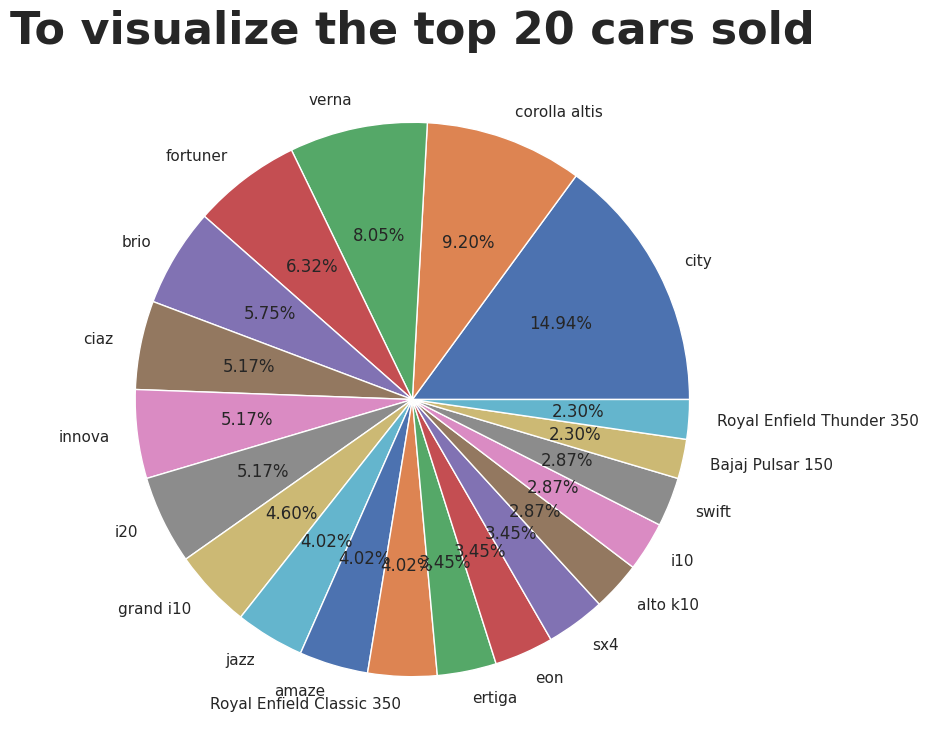

In [ ]:
car_names=data['Car_Name'].value_counts()
#To visualize the top 20 car's sold
label=['city','corolla altis','verna','fortuner','brio','ciaz','innova','i20','grand i10','jazz','amaze','Royal Enfield Classic 350','ertiga','eon','sx4','alto k10','i10','swift','Bajaj Pulsar 150','Royal Enfield Thunder 350']
plt.figure(figsize=(16,9))
plt.pie(car_names[:20],labels=label, autopct='%1.2f%%')
plt.title("To visualize the top 20 cars sold",fontsize=32,fontweight='bold')
plt.show()


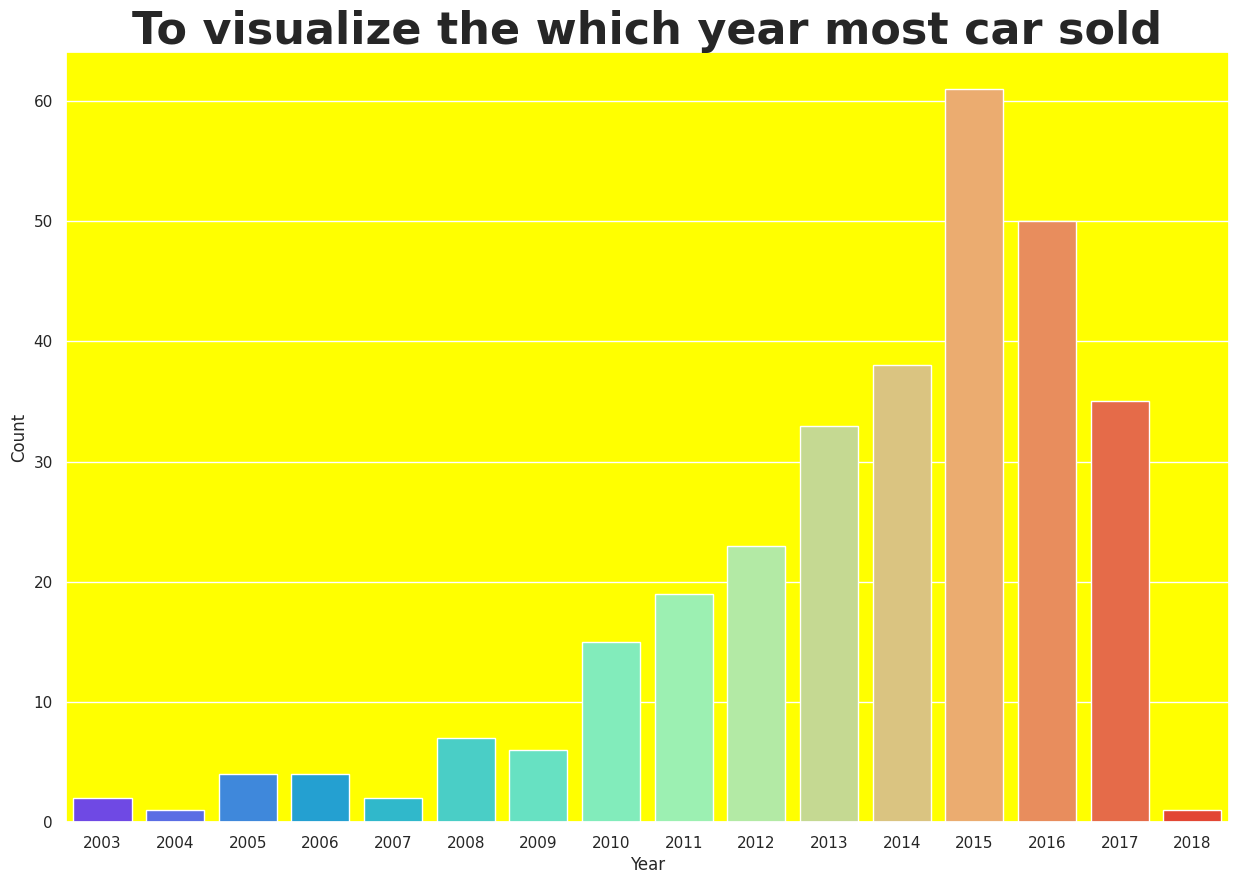

In [ ]:
year=data['Year'].value_counts()
#to visualize the year in the seaborn barplot
ax=plt.axes()
#set the background color
ax.set(facecolor='yellow')
#set the figures size
sns.set(rc={'figure.figsize':(16,8)},style='darkgrid')
#set the title of the plot
ax.set_title("To visualize the which year most car sold",fontsize=32,fontweight=900)
#let's visualize the barplot
sns.barplot(x=year.index,y=year,palette='rainbow')
#on the x axis
plt.xlabel("Year")
#on the y_axis
plt.ylabel("Count")
#let's visualize the image
plt.show()


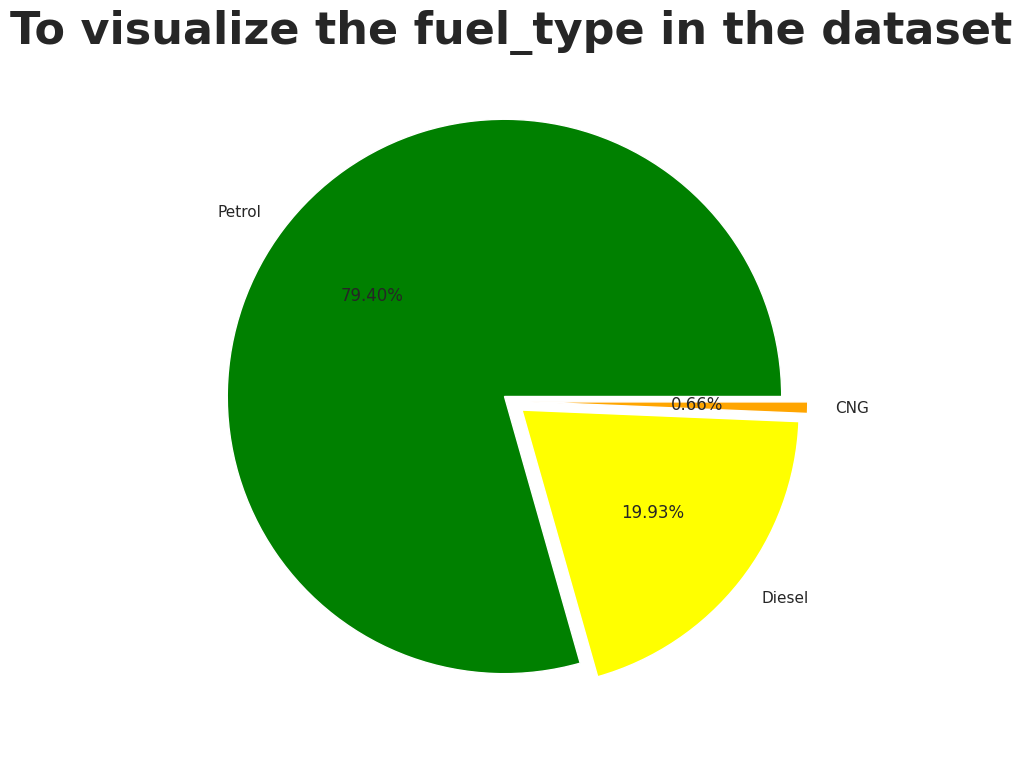

In [ ]:
#Let's visualize the car names in the dataset
fuel_type=data['Fuel_Type'].value_counts()
#To visualize the top 20 car's sold
label=['Petrol','Diesel','CNG']
plt.figure(figsize=(16,9))
plt.pie(fuel_type,labels=label, autopct='%1.2f%%',explode=[0.03,0.05,0.07],colors=['green','yellow','orange'])
plt.title("To visualize the fuel_type in the dataset",fontsize=32,fontweight='bold')
plt.show()


ValueError: ignored

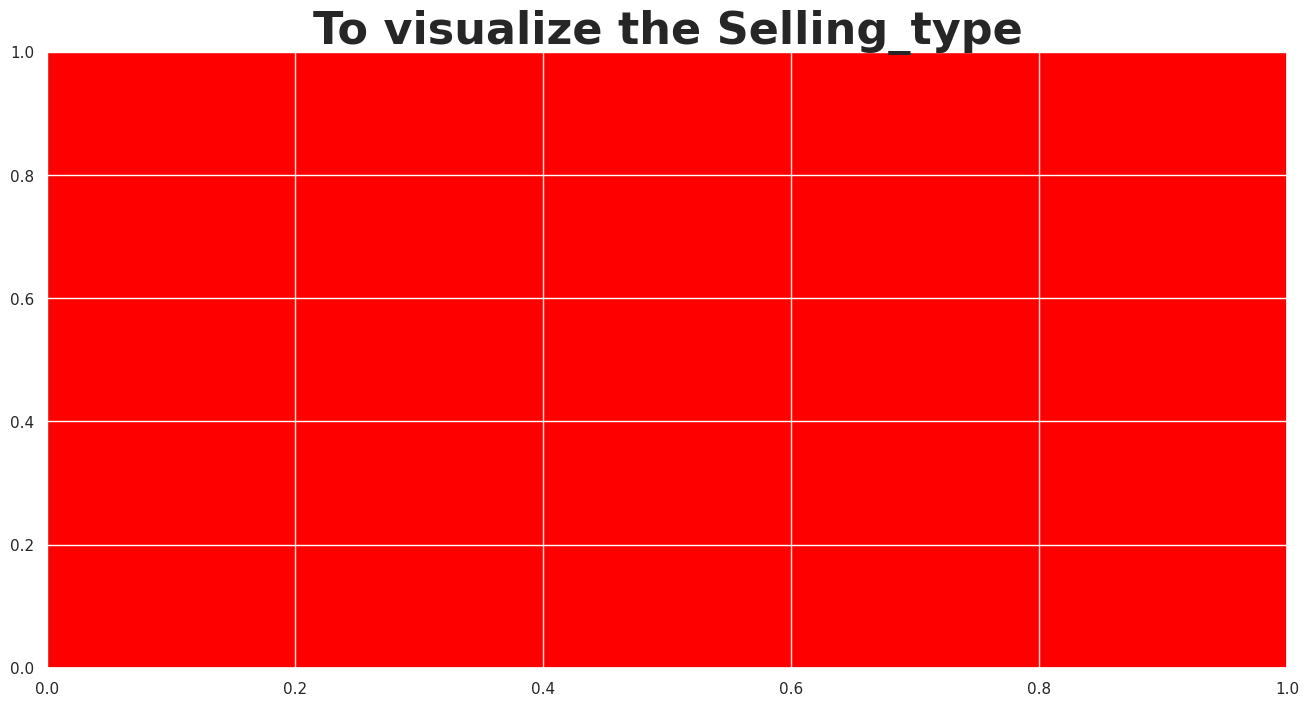

In [ ]:
#to visualize the year in the seaborn countplot
ax=plt.axes()
#set the background color
ax.set(facecolor='red')
#set the figures size
sns.set(rc={'figure.figsize':(8,6)},style='darkgrid')
#set the title of the plot
ax.set_title("To visualize the Selling_type",fontsize=32,fontweight=900)
#let's visualize the barplot
sns.countplot(data['Selling_type'],palette='rainbow')
#on the x axis
plt.xlabel("Selling_type")
#on the y_axis
plt.ylabel("Count")
#let's visualize the image
plt.show()

<ipython-input-17-0b4321740853>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Selling_Price'],fit=norm,kde=False,color='gray')


<Axes: xlabel='Selling_Price'>

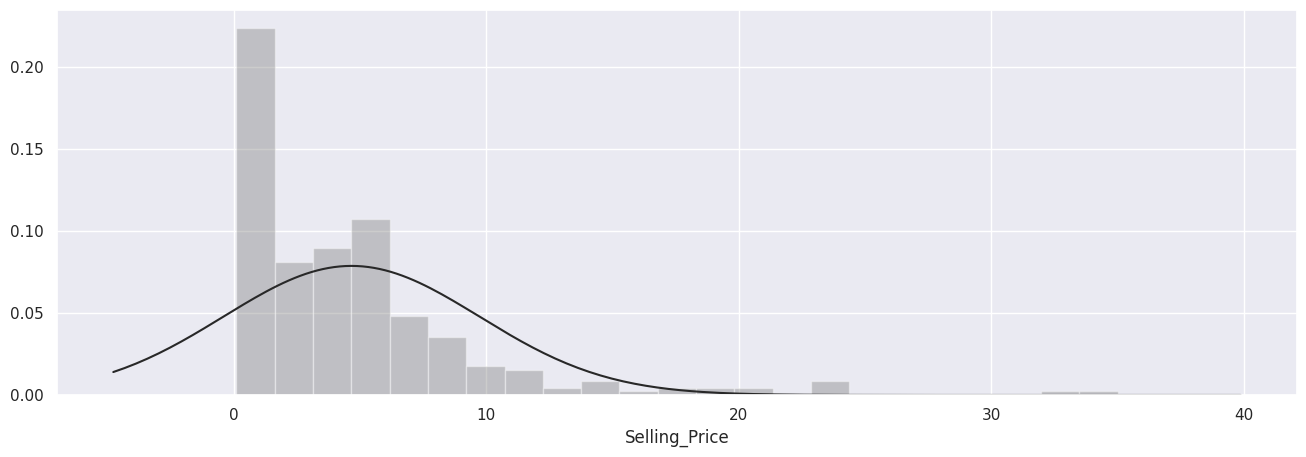

In [ ]:
from scipy.stats import norm
#Visualize the distplot
sns.set(rc={'figure.figsize':(16,5)})
#to visualize the Selling_Price in the dataset
sns.distplot(data['Selling_Price'],fit=norm,kde=False,color='gray')

<ipython-input-18-ee7108e463f2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Present_Price'],fit=norm,kde=False,color='blue')


<Axes: xlabel='Present_Price'>

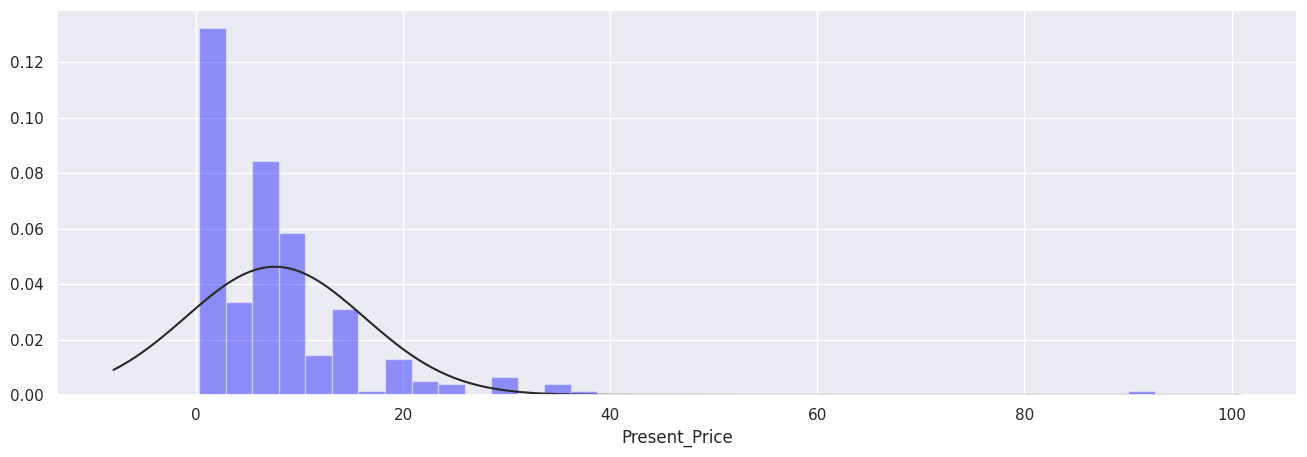

In [ ]:
sns.set(rc={'figure.figsize':(16,5)})
#to visualize the Present_Price in the dataset
sns.distplot(data['Present_Price'],fit=norm,kde=False,color='blue')

In [ ]:
#Let's check the car model wiht selling price
car_selling_price=data[['Car_Name','Selling_Price']].groupby(['Car_Name','Selling_Price']).sum().reset_index().sort_values(by='Selling_Price',ascending=False)
import plotly.express as px
fig=px.histogram(car_selling_price,x='Car_Name',y='Selling_Price',title="To visualize the car model with selling price")
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='black')

fig.show()

In [ ]:
fig=px.scatter(data,y='Selling_Price',x='Present_Price')
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='yellow')
fig.show()


<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

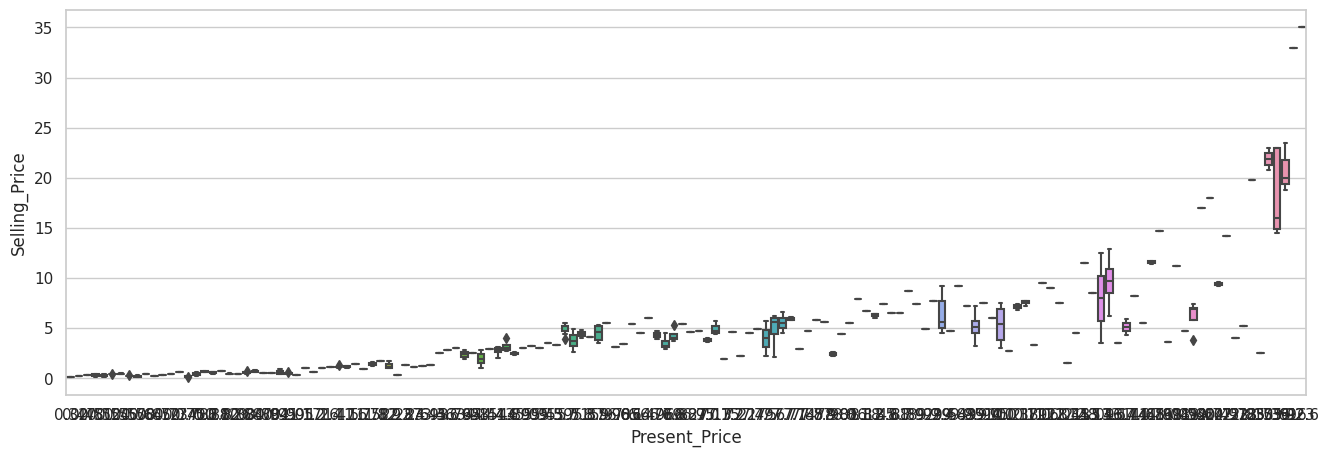

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x = 'Present_Price', y = 'Selling_Price', data = data)

<Axes: xlabel='Car_Name', ylabel='Selling_Price'>

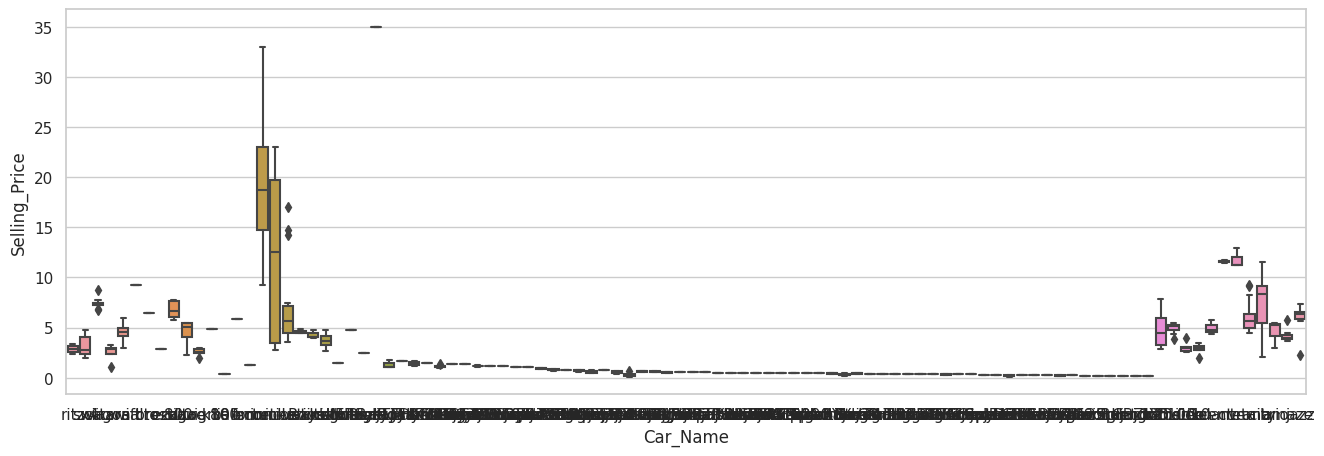

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x ='Car_Name',y ='Selling_Price', data = data)


<Axes: xlabel='Fuel_Type', ylabel='Present_Price'>

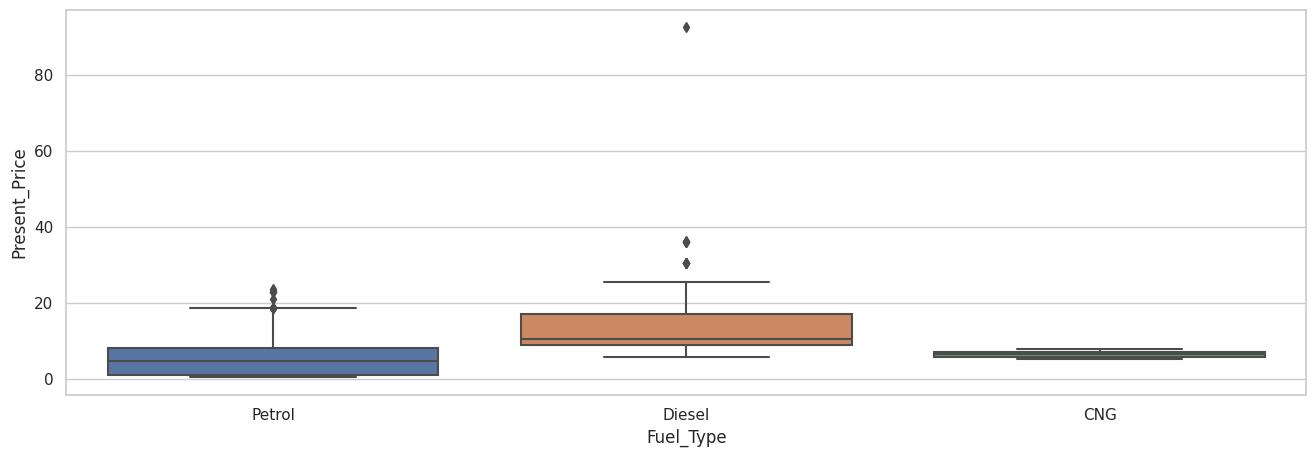

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(y = 'Present_Price', x = 'Fuel_Type', data = data)

<Axes: xlabel='Selling_type', ylabel='Present_Price'>

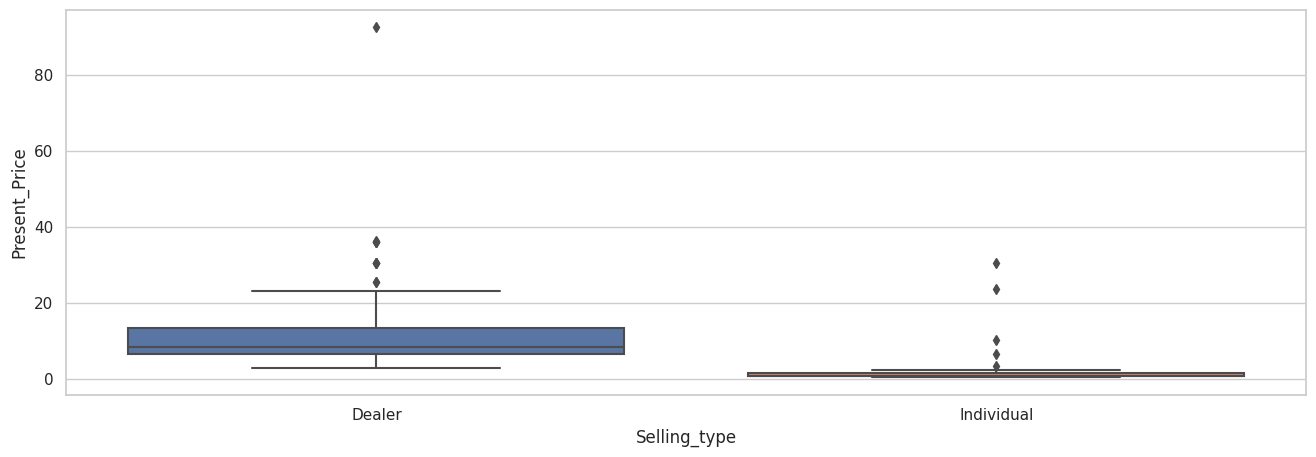

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(y ='Present_Price', x = 'Selling_type', data = data)

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

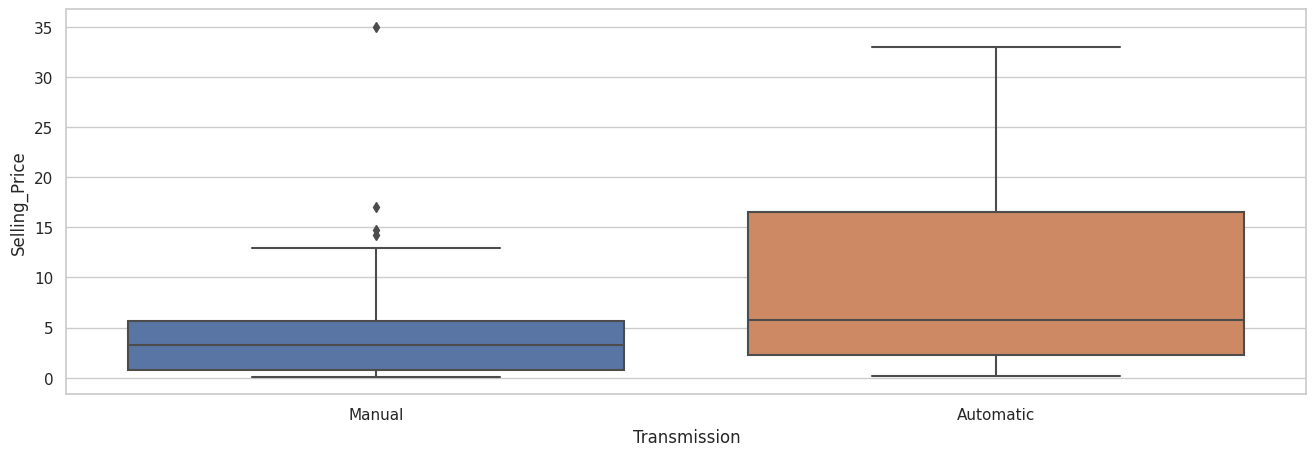

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(y ='Selling_Price', x = 'Transmission', data = data)

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
label=LabelEncoder()
data['Car_Name']=label.fit_transform(data['Car_Name'])
data['Fuel_Type']=label.fit_transform(data['Fuel_Type'])
data['Selling_type']=label.fit_transform(data['Selling_type'])
data['Transmission']=label.fit_transform(data['Transmission'])

In [ ]:
X=data.drop(['Selling_Price'],axis=1)
y=data['Selling_Price']

In [ ]:
scaler=StandardScaler()
#Let's normalize the train dataset
X=scaler.fit_transform(X)

NameError: ignored

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


NameError: ignored